In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


# Load Data from Drive


In [2]:

df=pd.read_csv("Parking_Citations_After_July_1_2015.csv",low_memory=False)
df.head()

Ticket number              Issue Date  Issue time Meter Id  Marked Time  \
0    4361370075  2019/09/17 12:00:00 AM       817.0      NaN          NaN   
1    4361370064  2019/09/17 12:00:00 AM       811.0     VM48          NaN   
2    4361370053  2019/09/17 12:00:00 AM       809.0      NaN          NaN   
3    4361370042  2019/09/17 12:00:00 AM       805.0      NaN          NaN   
4    4361370031  2019/09/17 12:00:00 AM       727.0      NaN          NaN   

  RP State Plate  VIN  Make Body Style Color          Location  Route  Agency  \
0             LA  NaN  MERC         PA    RD    1324 84TH PL W  00551    55.0   
1             CA  NaN  BUIC         PA    GN    1000 85TH ST W  00551    55.0   
2             CA  NaN  TOYT         PA    GY    1000 85TH ST W  00551    55.0   
3             CA  NaN  NISS         PA    BK  8021 VERMONT AVE  00551    55.0   
4             CA  NaN  HOND         PA    GY    1473 45TH ST W  00551    55.0   

  Violation code Violation Description Fine amount      Latitude     Longitude  
0        80.69BS  NO PARK/STREET CLEAN          73  6.471017e+06  1.808559e+06  
1        88.13B+            METER EXP.          63  6.473192e+06  1.808298e+06  
2        80.69BS  NO PARK/STREET CLEAN          73  6.473192e+06  1.808298e+06  
3        80.69BS  NO PARK/STREET CLEAN          73  6.473164e+06  1.810388e+06  
4         22500E     BLOCKING DRIVEWAY          68  6.469917e+06  1.823537e+06

# Data Handling


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8706412 entries, 0 to 8706411
Data columns (total 18 columns):
Ticket number            object
Issue Date               object
Issue time               float64
Meter Id                 object
Marked Time              float64
RP State Plate           object
VIN                      float64
Make                     object
Body Style               object
Color                    object
Location                 object
Route                    object
Agency                   float64
Violation code           object
Violation Description    object
Fine amount              object
Latitude                 float64
Longitude                float64
dtypes: float64(6), object(12)
memory usage: 1.2+ GB


In [24]:
df['Ticket number'] = pd.to_numeric(df['Ticket number'], errors='coerce')
df['Fine amount'] = pd.to_numeric(df['Fine amount'], errors='coerce')
df['Route'] = pd.to_numeric(df['Route'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8706412 entries, 0 to 8706411
Data columns (total 18 columns):
Ticket number            float64
Issue Date               object
Issue time               float64
Meter Id                 object
Marked Time              float64
RP State Plate           object
VIN                      float64
Make                     object
Body Style               object
Color                    object
Location                 object
Route                    float64
Agency                   float64
Violation code           object
Violation Description    object
Fine amount              float64
Latitude                 float64
Longitude                float64
dtypes: float64(9), object(9)
memory usage: 1.2+ GB


In [27]:
import geopandas
import pyproj


In [16]:
from geopandas import GeoDataFrame
from shapely.geometry import Point
from pyproj import Proj, transform

In [22]:
geo = df[["Latitude", "Longitude"]]                                       
inProj = Proj(init ='EPSG:3857')
outProj = Proj(init ='EPSG:4326')
x1, y1 = geo.iloc[0]["Latitude"], geo.iloc[0]["Longitude"]
#x2, y2 = transform(inProj, outProj, x1, y1)

print(x1, y1)
#print(x2, y2)

RuntimeError: b'no arguments in initialization list'

In [31]:
geo = df[["Latitude", "Longitude"]]
x, y = geo.iloc[0]["Latitude"], geo.iloc[0]["Longitude"]
projstr = """+proj=lcc +lat_1=40.66666666666666 +lat_2=41.03333333333333 +lat_0=40.16666666666666 +lon_0=-74 
+x_0=300000 +y_0=0 +ellps=GRS80 +datum=NAD83 
+to_meter=0.3048006096012192 +units=us-ft +no_defs"""

myproj = pyproj.Proj(projstr, preserve_units= True)
myproj(x,y, inverse = True)


(-53.20326761711215, 43.33321796594023)

In [35]:
geo = df[["Latitude", "Longitude"]]
x, y = geo["Latitude"].tolist(), geo["Longitude"].tolist()
projstr = """+proj=lcc +lat_1=40.66666666666666 +lat_2=41.03333333333333 +lat_0=40.16666666666666 +lon_0=-74 
+x_0=300000 +y_0=0 +ellps=GRS80 +datum=NAD83 
+to_meter=0.3048006096012192 +units=us-ft +no_defs"""

myproj = pyproj.Proj(projstr, preserve_units= True)
x_1, y_1 = myproj(x,y, inverse = True)
df["Latitude_1"] = pd.Series(x_1)

df["Longitude_1"] = pd.Series(y_1)

df.head(2)

Ticket number              Issue Date  Issue time Meter Id  Marked Time  \
0    4361370075  2019/09/17 12:00:00 AM       817.0      NaN          NaN   
1    4361370064  2019/09/17 12:00:00 AM       811.0     VM48          NaN   

  RP State Plate  VIN  Make Body Style Color        Location  Route  Agency  \
0             LA  NaN  MERC         PA    RD  1324 84TH PL W  00551    55.0   
1             CA  NaN  BUIC         PA    GN  1000 85TH ST W  00551    55.0   

  Violation code Violation Description Fine amount      Latitude  \
0        80.69BS  NO PARK/STREET CLEAN          73  6.471017e+06   
1        88.13B+            METER EXP.          63  6.473192e+06   

      Longitude  Latitude_1  Longitude_1  
0  1.808559e+06  -53.203268    43.333218  
1  1.808298e+06  -53.195561    43.331120

In [56]:
geometry = [Point(xy) for xy in zip(df["Latitude"],df["Longitude"])]
geometry[:3]

In [57]:
crs = {'init': 'epsg:4269'} #epsg:4362(WGS84)
geo_df = geopandas.GeoDataFrame(df,crs = crs, geometry= geometry)
geo_df.head(10)

Ticket number              Issue Date  Issue time Meter Id  Marked Time  \
0    4361370075  2019/09/17 12:00:00 AM       817.0      NaN          NaN   
1    4361370064  2019/09/17 12:00:00 AM       811.0     VM48          NaN   
2    4361370053  2019/09/17 12:00:00 AM       809.0      NaN          NaN   
3    4361370042  2019/09/17 12:00:00 AM       805.0      NaN          NaN   
4    4361370031  2019/09/17 12:00:00 AM       727.0      NaN          NaN   
5    4361370016  2019/09/17 12:00:00 AM       611.0      NaN          NaN   
6    4361354034  2019/09/17 12:00:00 AM      1750.0    MD413          NaN   
7    4361342101  2019/09/17 12:00:00 AM      1452.0      NaN          NaN   
8    4361342090  2019/09/17 12:00:00 AM      1320.0   CB2607          NaN   
9    4361342086  2019/09/17 12:00:00 AM      1316.0      NaN          NaN   

  RP State Plate  VIN  Make Body Style Color  ...  Route Agency  \
0             LA  NaN  MERC         PA    RD  ...  00551   55.0   
1             CA  NaN  BUIC         PA    GN  ...  00551   55.0   
2             CA  NaN  TOYT         PA    GY  ...  00551   55.0   
3             CA  NaN  NISS         PA    BK  ...  00551   55.0   
4             CA  NaN  HOND         PA    GY  ...  00551   55.0   
5             CA  NaN  NISS         PA    BL  ...  00551   55.0   
6             CA  NaN  HOND         PA    GY  ...  00600   56.0   
7             CA  NaN  FORD         PU    WT  ...  00665   56.0   
8             CA  NaN  VOLK         PA    BL  ...  00665   56.0   
9             CA  NaN  MERZ         PA    SL  ...  00665   56.0   

   Violation code Violation Description Fine amount      Latitude  \
0         80.69BS  NO PARK/STREET CLEAN          73  6.471017e+06   
1         88.13B+            METER EXP.          63  6.473192e+06   
2         80.69BS  NO PARK/STREET CLEAN          73  6.473192e+06   
3         80.69BS  NO PARK/STREET CLEAN          73  6.473164e+06   
4          22500E     BLOCKING DRIVEWAY          68  6.469917e+06   
5          22500F    PARKED ON SIDEWALK          68  9.999900e+04   
6         88.13B+            METER EXP.          63  6.498692e+06   
7        80.56E4+              RED ZONE          93  6.486540e+06   
8         88.13B+            METER EXP.          63  6.484173e+06   
9        80.56E4+              RED ZONE          93  6.485386e+06   

      Longitude  Latitude_1  Longitude_1                         geometry  
0  1.808559e+06  -53.203268    43.333218  POINT (6471016.784 1808559.113)  
1  1.808298e+06  -53.195561    43.331120  POINT (6473191.784 1808297.974)  
2  1.808298e+06  -53.195561    43.331120  POINT (6473191.784 1808297.974)  
3  1.810388e+06  -53.193816    43.336706  POINT (6473163.889 1810388.064)  
4  1.823537e+06  -53.194048    43.373828  POINT (6469917.106 1823537.453)  
5  9.999900e+04  -77.175283    40.397153      POINT (99999.000 99999.000)  
6  1.846041e+06  -53.068995    43.415152  POINT (6498692.010 1846040.749)  
7  1.839072e+06  -53.119578    43.404468  POINT (6486539.572 1839072.228)  
8  1.838669e+06  -53.128582    43.404924  POINT (6484172.628 1838668.605)  
9  1.837137e+06  -53.125508    43.400061  POINT (6485386.035 1837137.208)  

[10 rows x 21 columns]

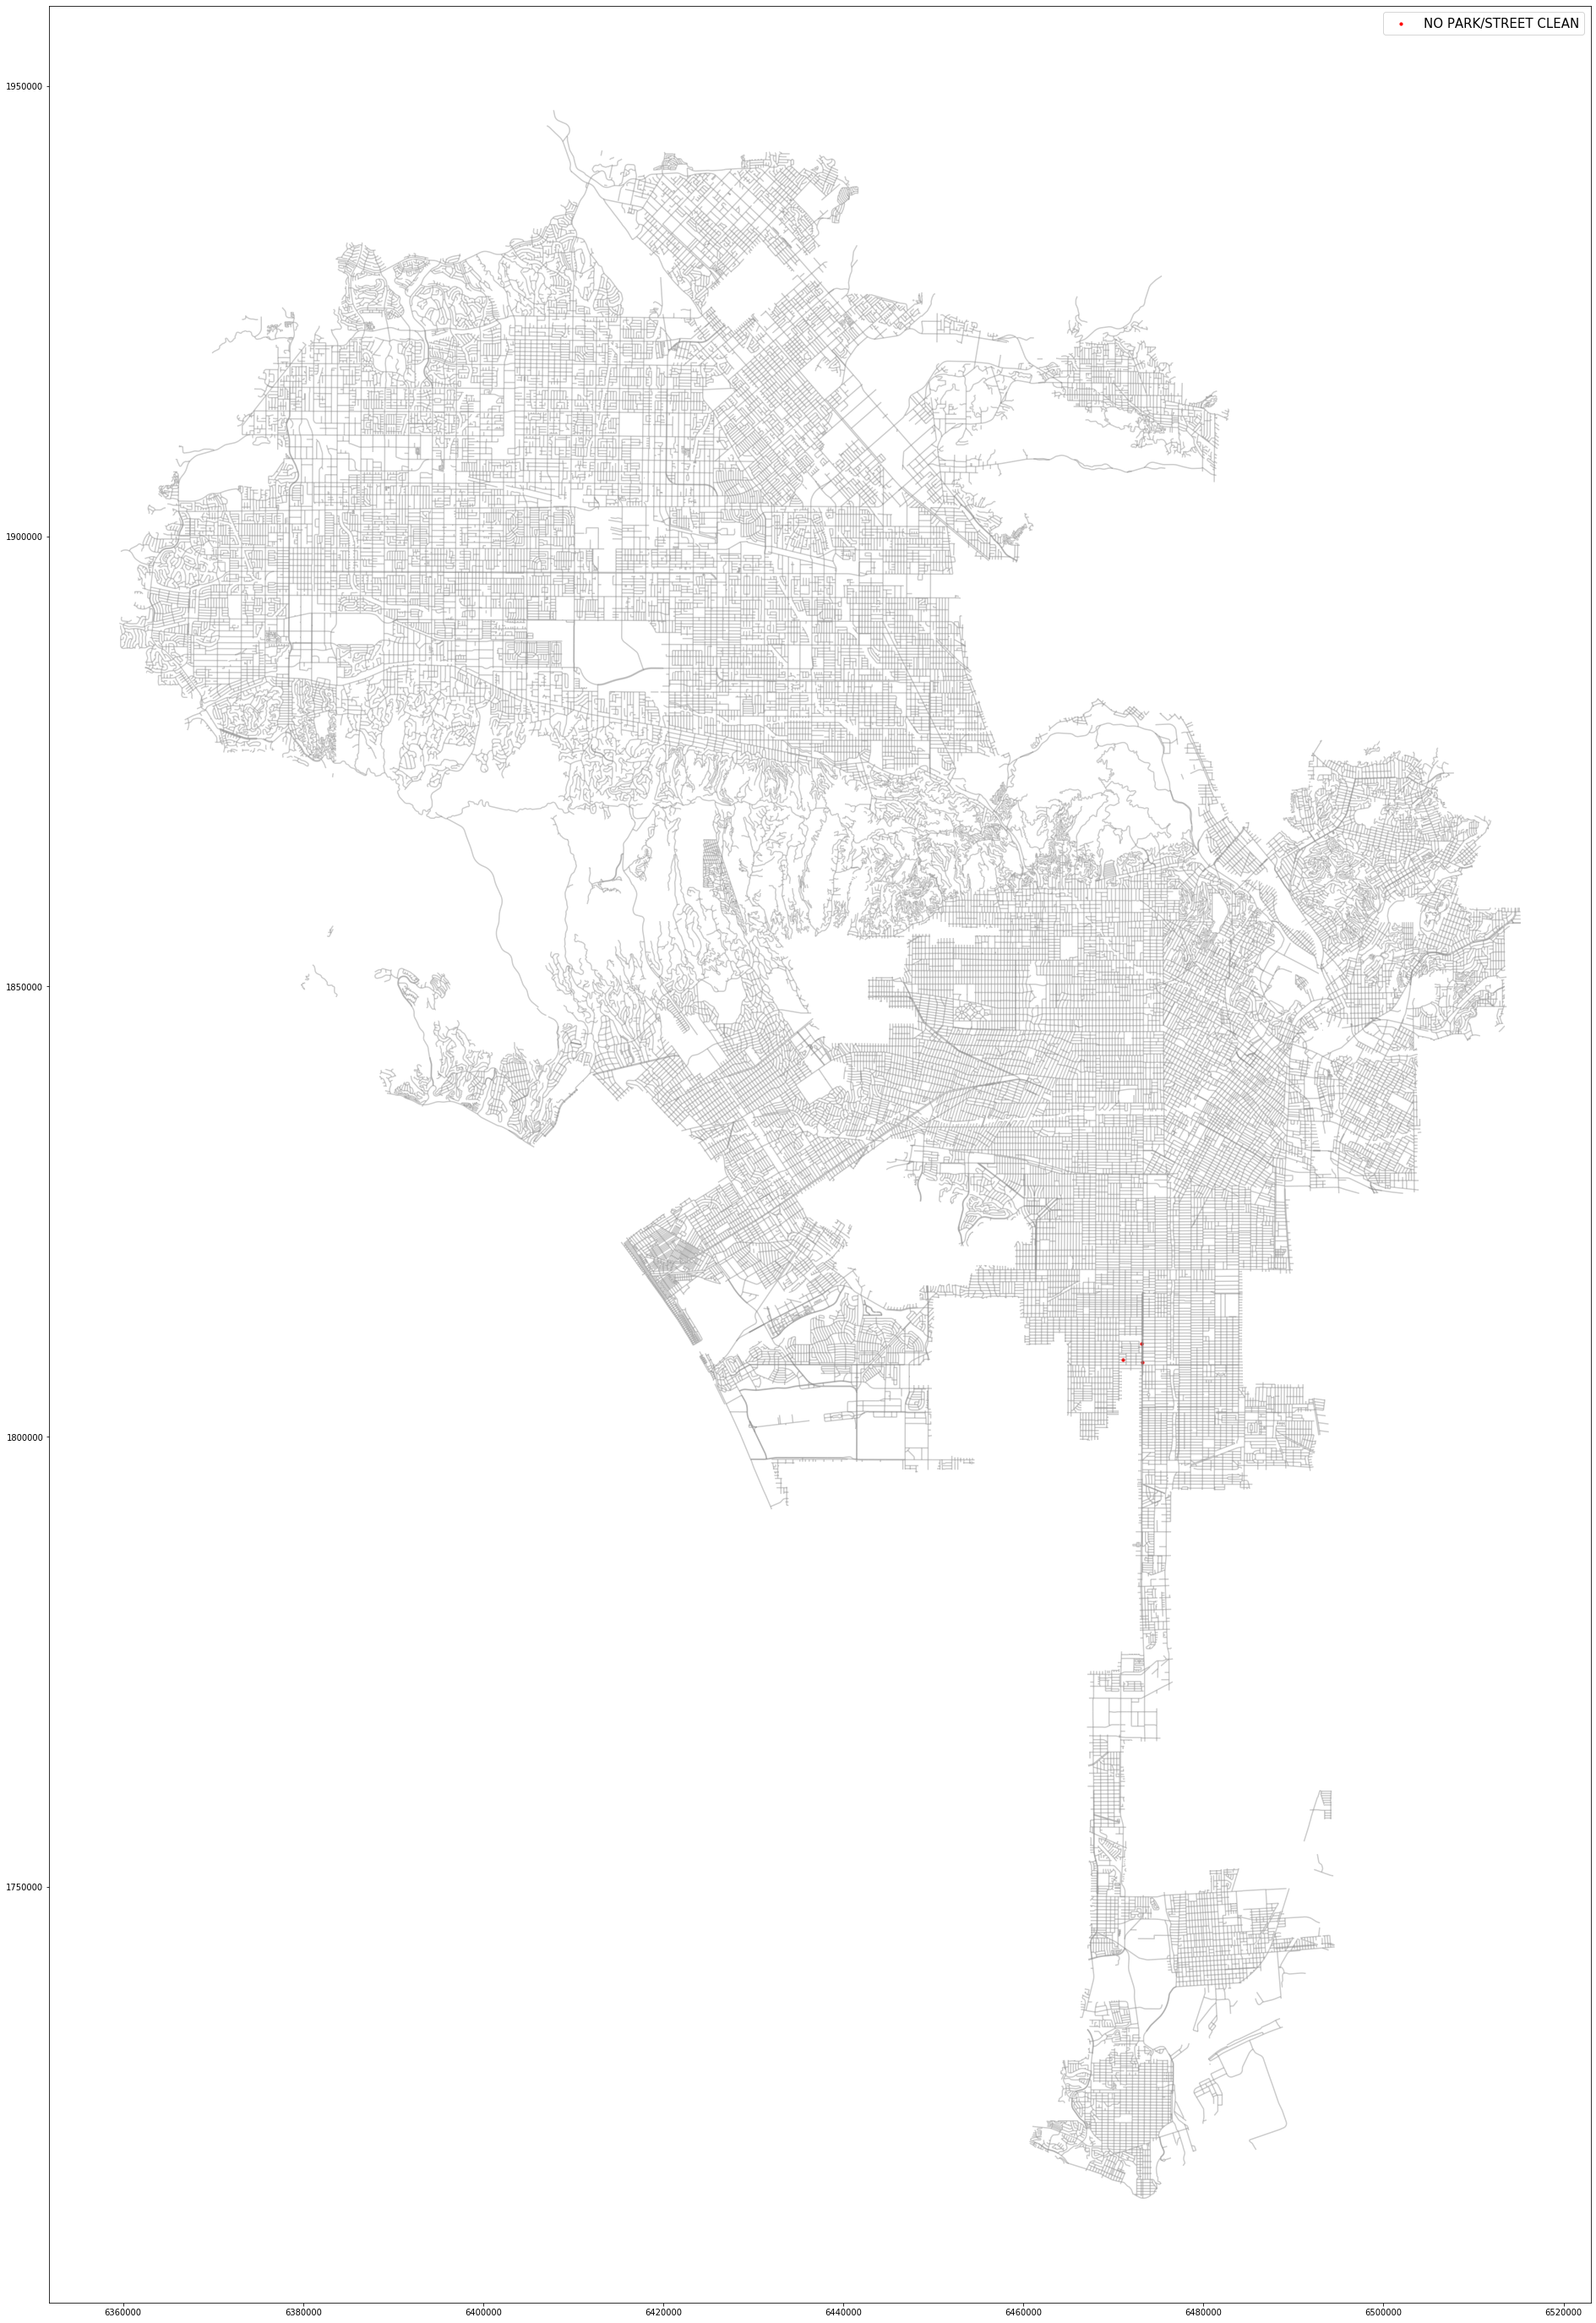

In [63]:


street_map = geopandas.read_file('Street Centerline.shp')
fig, ax = plt.subplots(figsize = (50,50))

street_map.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df.iloc[:5][geo_df.iloc[:5]["Violation Description"]== 'NO PARK/STREET CLEAN'].plot(ax=ax, markersize = 10 , color = 'red', marker= "o", label = 'NO PARK/STREET CLEAN')
plt.legend(prop ={'size': 15})

1715555.176091 1942668.996228
6359739.30402891 6514332.07372465


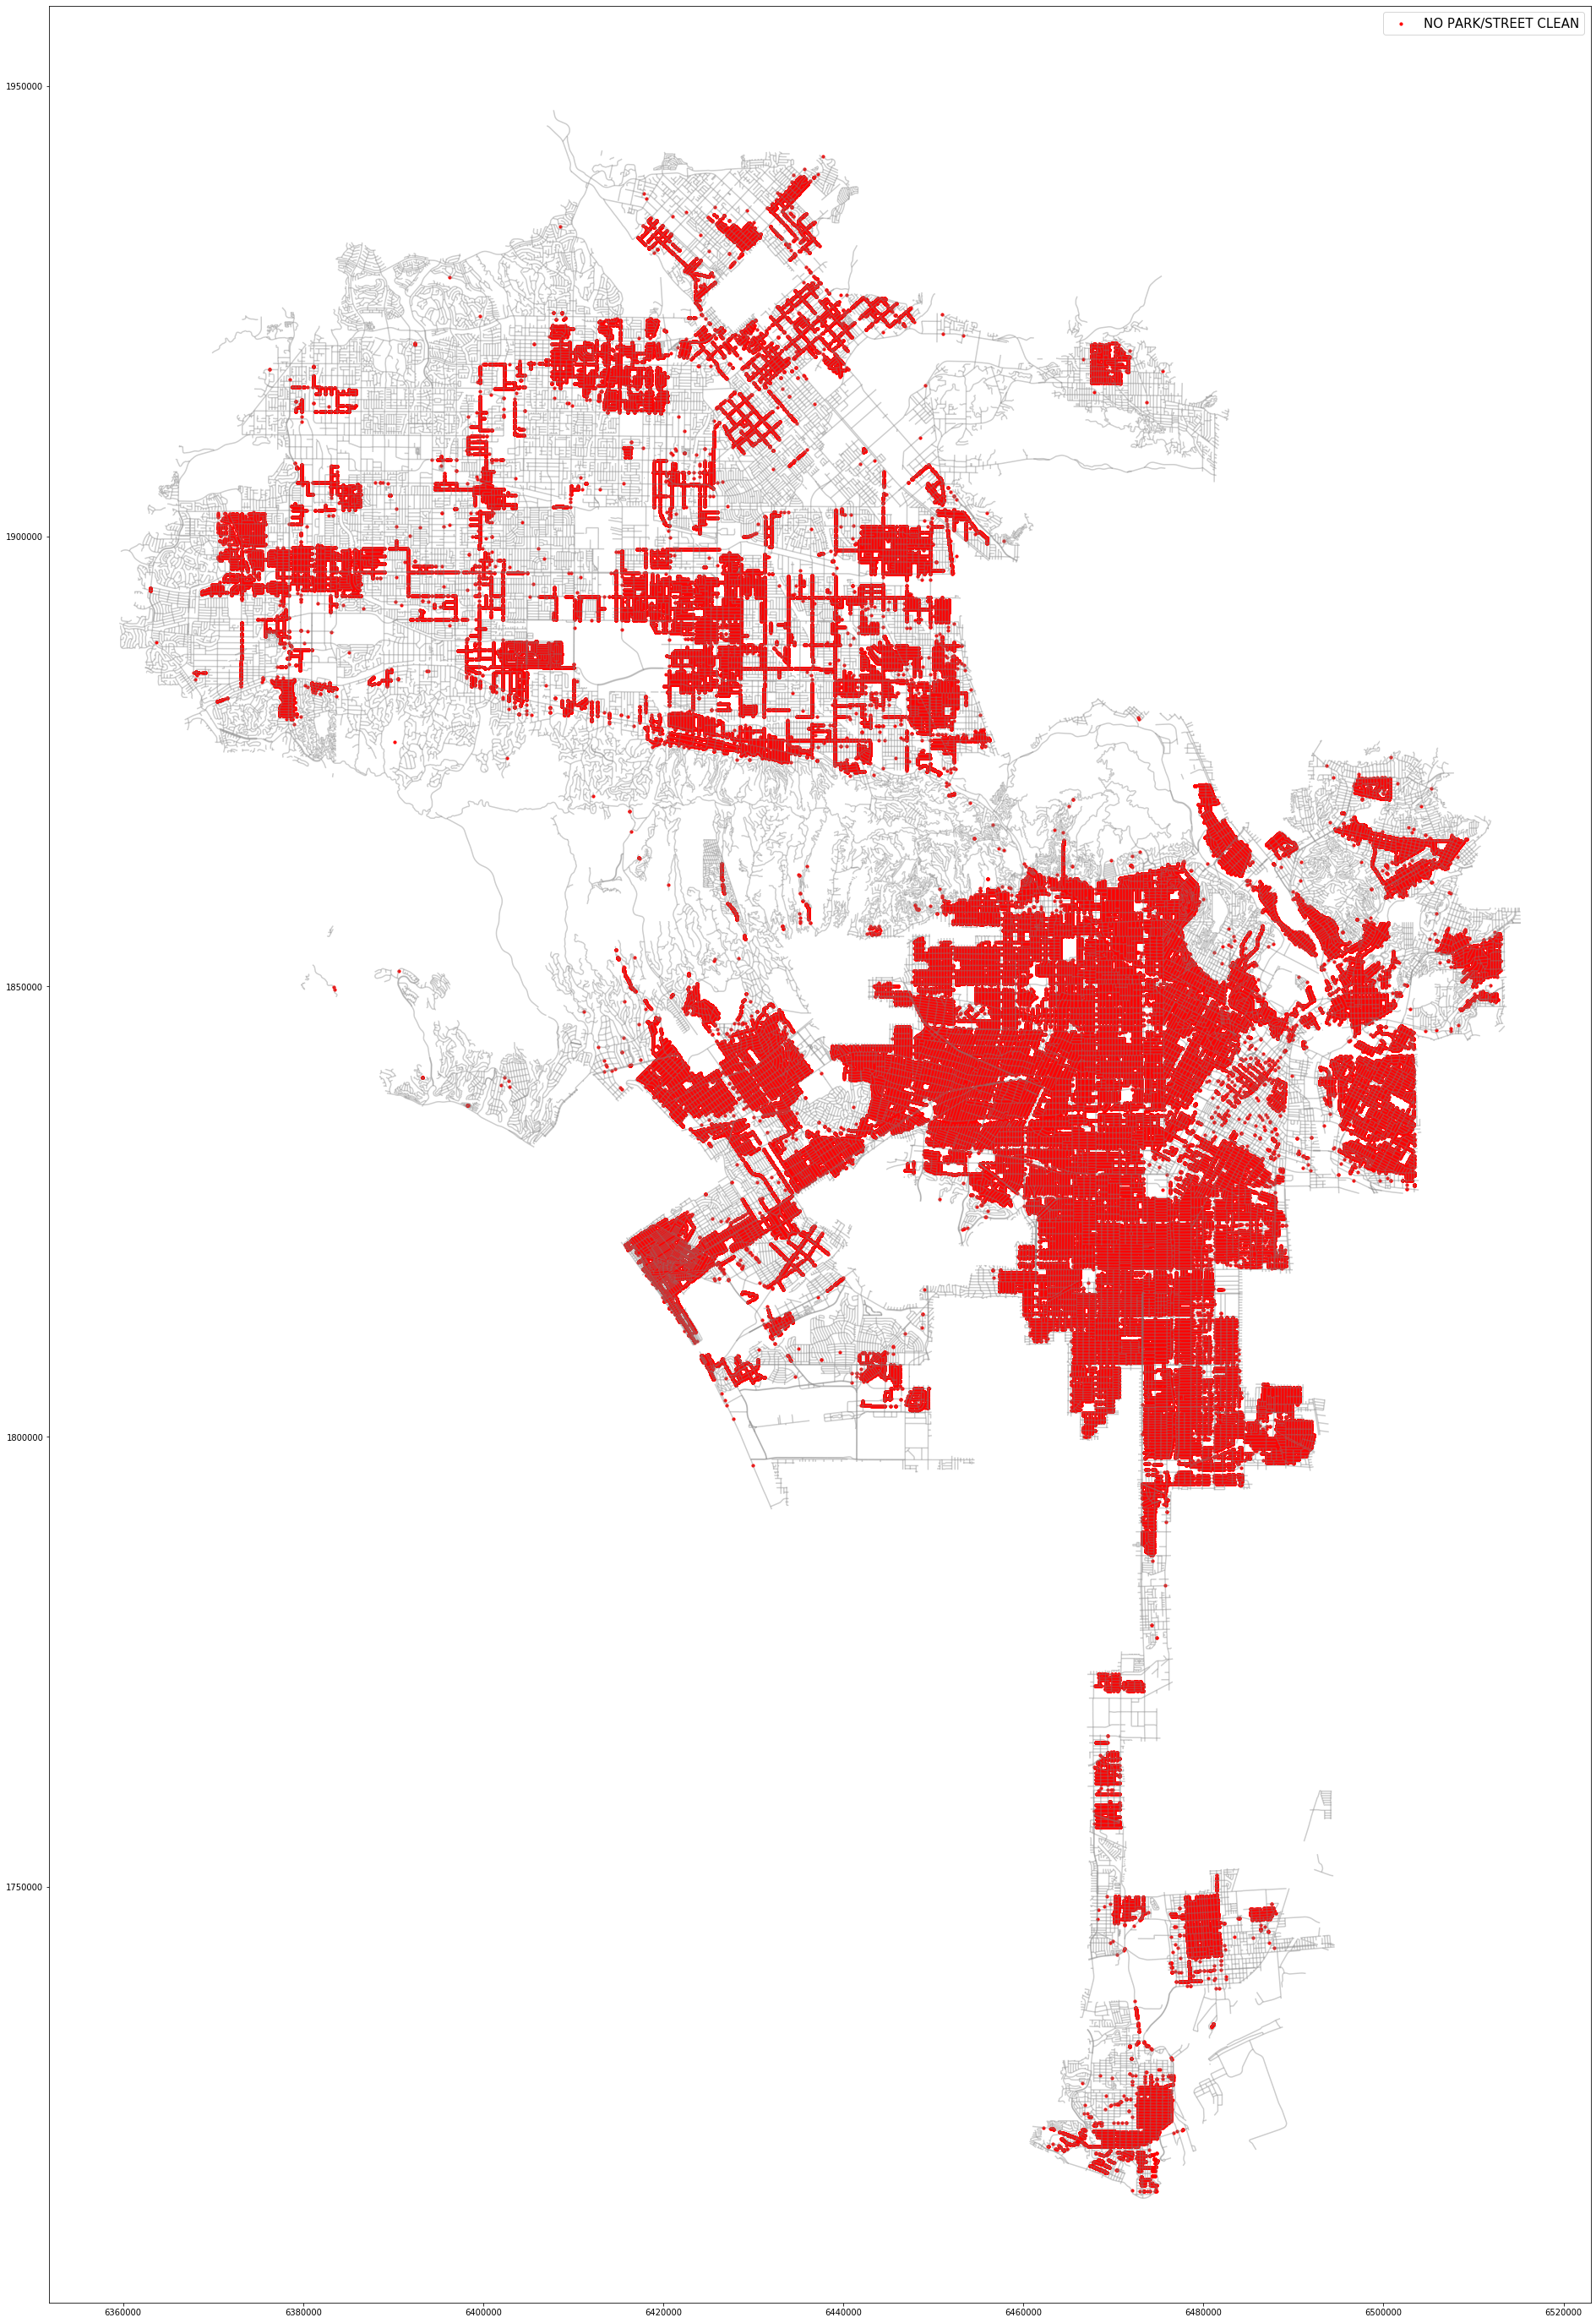

In [69]:
# data_cleaning
df_1 = df.copy()
df_1 = df_1[df_1["Latitude"] != 99999]
df_1 = df_1[df_1["Longitude"] != 99999]
print(df_1["Longitude"].min(), df_1["Longitude"].max())
print(df_1["Latitude"].min(), df_1["Latitude"].max())

geometry = [Point(xy) for xy in zip(df_1["Latitude"],df_1["Longitude"])]
geometry[:3]

crs = {'init': 'epsg:4269'} #epsg:4362(WGS84)
geo_df = geopandas.GeoDataFrame(df_1,crs = crs, geometry= geometry)

street_map = geopandas.read_file('Street Centerline.shp')
fig, ax = plt.subplots(figsize = (50,50))

street_map.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df[geo_df["Violation Description"]== 'NO PARK/STREET CLEAN'].plot(ax=ax, markersize = 10 , color = 'red', marker= "o", label = 'NO PARK/STREET CLEAN')
plt.legend(prop ={'size': 15})

6359739.30402891 6514332.07372465
